## Importing qiskit and connecting to IBMQ

In [164]:
# Load the token
import warnings
warnings.filterwarnings('ignore')

In [165]:
import qiskit
from qiskit import IBMQ
IBMQ.save_account('79e0ee1cc29cb0dd80ed7e2a27aa20a39588496f3ecb74e417c903535edf6bc824238753df58ba9b186c349a7605e16321948caf61c2155d34fb83803960fcc8')

In [170]:
from qiskit import ClassicalRegister
# Create a Classical Register with 2 bits.
c = ClassicalRegister(2)
print(c)

ClassicalRegister(2, 'c5')


In [169]:
from qiskit import QuantumRegister
# Create a Quantum Register with 2 qubits.
q = QuantumRegister(2)
print(q)

QuantumRegister(2, 'q4')


## Quantum Circuits in Qiskit

### Hadamard Gate (superposition)

**Input : ** Single Qubit

**Output : **

$${|0\rangle} \ to  \  \frac {|0\rangle +|1\rangle }{\sqrt {2}} \ \ \ and \ \ \ {|1\rangle} \ to  \  \frac {|0\rangle -|1\rangle }{\sqrt {2}}$$

** Hadamard Matrix **

$$H = \frac{1}{\sqrt2} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

### Pauli-X Gate (NOT Gate)

**Input : ** Single Qubit

**Output : **

$${|0\rangle} \ to  \  {|1\rangle} \ \ \ and \ \ \ {|1\rangle} \ to \  {|0\rangle}$$

** X Matrix **

$$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$$

### Pauli-Y Gate 
##### (Rotation around Y axis of Bloch Sphere)

**Input : ** Single Qubit

**Output : **

$${|0\rangle} \ to  \  i {|1\rangle} \ \ \ and \ \ \ {|1\rangle} \ to \  -i{|0\rangle}$$

** Y Matrix **

$$Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}$$

## Pauli-Z Gate
##### ( rotation around the Z-axis of the Bloch sphere)

**Input : ** Single Qubit

**Output : **

$${|0\rangle} \ to  \  {|0\rangle} \ \ \ and \ \ \ {|1\rangle} \ to \  -{|1\rangle}$$

** Z Matrix **

$$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$

The Pauli matrices are involutory
The square of a Pauli matrix is the identity matrix.

$${\displaystyle I^{2}=X^{2}=Y^{2}=Z^{2}=-iXYZ=I}$$

## C-NOT Gate

**Input : ** 2 or more qubits

Let the input be $${|q_1\rangle} \  {|q_2\rangle}$$

**Output : **

   **If**
$${|q_1\rangle} = 1$$ 
   **then**
$${|q_2\rangle} = {|q_2\rangle}\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$$
   **otherwise**
$${|q_2\rangle} = {|q_2\rangle}$$

** CNOT Matrix **

$${\displaystyle {\mbox{CNOT}}=cX={\begin{bmatrix}1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{bmatrix}}}$$

In [150]:
from qiskit import QuantumCircuit
# Create a Quantum Circuit
qc = QuantumCircuit(q, c)
# perform a measurement of our qubits into our bits
qc.measure(q, c); # ; hides the output

In [151]:
from qiskit.tools.visualization import circuit_drawer as draw
draw(qc) # visualize quantum circuit

In [159]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2, 2)
draw(circuit)
circuit.h(1)
circuit.y(0)
circuit.x(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])
circuit.draw()


In [160]:
from qiskit import execute, Aer

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'10': 486, '00': 514}


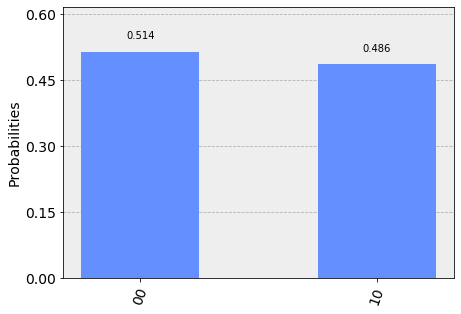

In [161]:
plot_histogram(counts)

In [162]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(1)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(1, 0)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'00': 476, '11': 524}


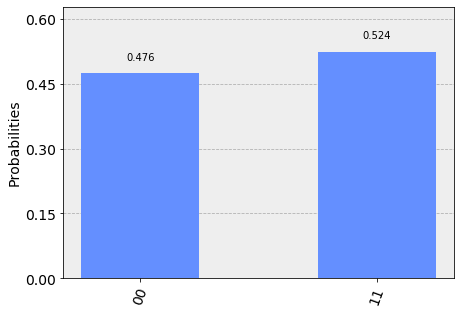

In [163]:
plot_histogram(counts)

## Superposition

Any two (or more) quantum states can be added together (**superposed**) and the result will be another valid quantum state
And conversely, that every quantum state can be represented as a sum of two or more other distinct states.

Mathematically, it refers to a property of solutions to the Schrödinger equation; since the Schrödinger equation is linear, any linear combination of solutions will also be a solution.

$${\displaystyle i\hbar {\frac {d}{dt}}\vert \Psi (t)\rangle ={\hat {H}}\vert \Psi (t)\rangle }$$

## Entanglement

Quantum entanglement is a physical phenomenon that occurs when pairs or groups of particles are generated, interact, or share spatial proximity in ways such that the **quantum state of each particle cannot be described independently of the state of the others**, even when the particles are separated by a large distance.

For example, given two basis vectors 
$${\displaystyle \scriptstyle \{|0\rangle _{A},|1\rangle _{A}\}}$$ of HA and two basis vectors $${\displaystyle \scriptstyle \{|0\rangle _{B},|1\rangle _{B}\}}$$ of HB

the following is an entangled state:

$${\displaystyle {\tfrac {1}{\sqrt {2}}}\left(|0\rangle _{A}\otimes |1\rangle _{B}-|1\rangle _{A}\otimes |0\rangle _{B}\right)}$$

## Teleportation